![EDA](../5_Sources/Images/banner_eda.gif)

# <h2 align=center>**`EDA Google Maps`**</h2>

Importando las librer√≠as

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast
import seaborn as sns
import matplotlib.pyplot as plt

>**`Dataset 'df_estados.csv'`**

Importar el dataset

In [23]:
# Load data into pandas DataFrame from "/lakehouse/default/" + "Files/data/original/Google/df_estados.csv"
#df_estados = pd.read_csv("/lakehouse/default/" + "Files/data/original/Google/df_estados.csv")

df_estados = pd.read_csv('df_estados.csv', encoding='UTF-8')

#Descartando la primera columna del dataframe ya que no es necesaria
df_estados= df_estados.iloc[:,2:]
pd.options.display.max_columns=0
df_estados.head(2)

name_x  ...   estado
0  Holiday Inn Express & Suites Fultondale  ...  Alabama
1  Holiday Inn Express & Suites Fultondale  ...  Alabama

[2 rows x 24 columns]

Verificar el tipo de dato de cada columna y la existencia de valores nulos

In [24]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58216 entries, 0 to 58215
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name_x            58216 non-null  object 
 1   address           58196 non-null  object 
 2   gmap_id           58216 non-null  object 
 3   description       38407 non-null  object 
 4   latitude          58216 non-null  float64
 5   longitude         58216 non-null  float64
 6   category          58216 non-null  object 
 7   avg_rating        58216 non-null  float64
 8   num_of_reviews    58216 non-null  int64  
 9   price             0 non-null      float64
 10  hours             0 non-null      float64
 11  MISC              10746 non-null  object 
 12  state             0 non-null      float64
 13  relative_results  56268 non-null  object 
 14  url               58216 non-null  object 
 15  category_hotel    58216 non-null  object 
 16  user_id           58216 non-null  float6

Conocer el n√∫mero de filas y columnas del dataframe

In [25]:
df_estados.shape

(58216, 24)

Se realiza un heatmap para visualizar los campos que contegan valores nulos

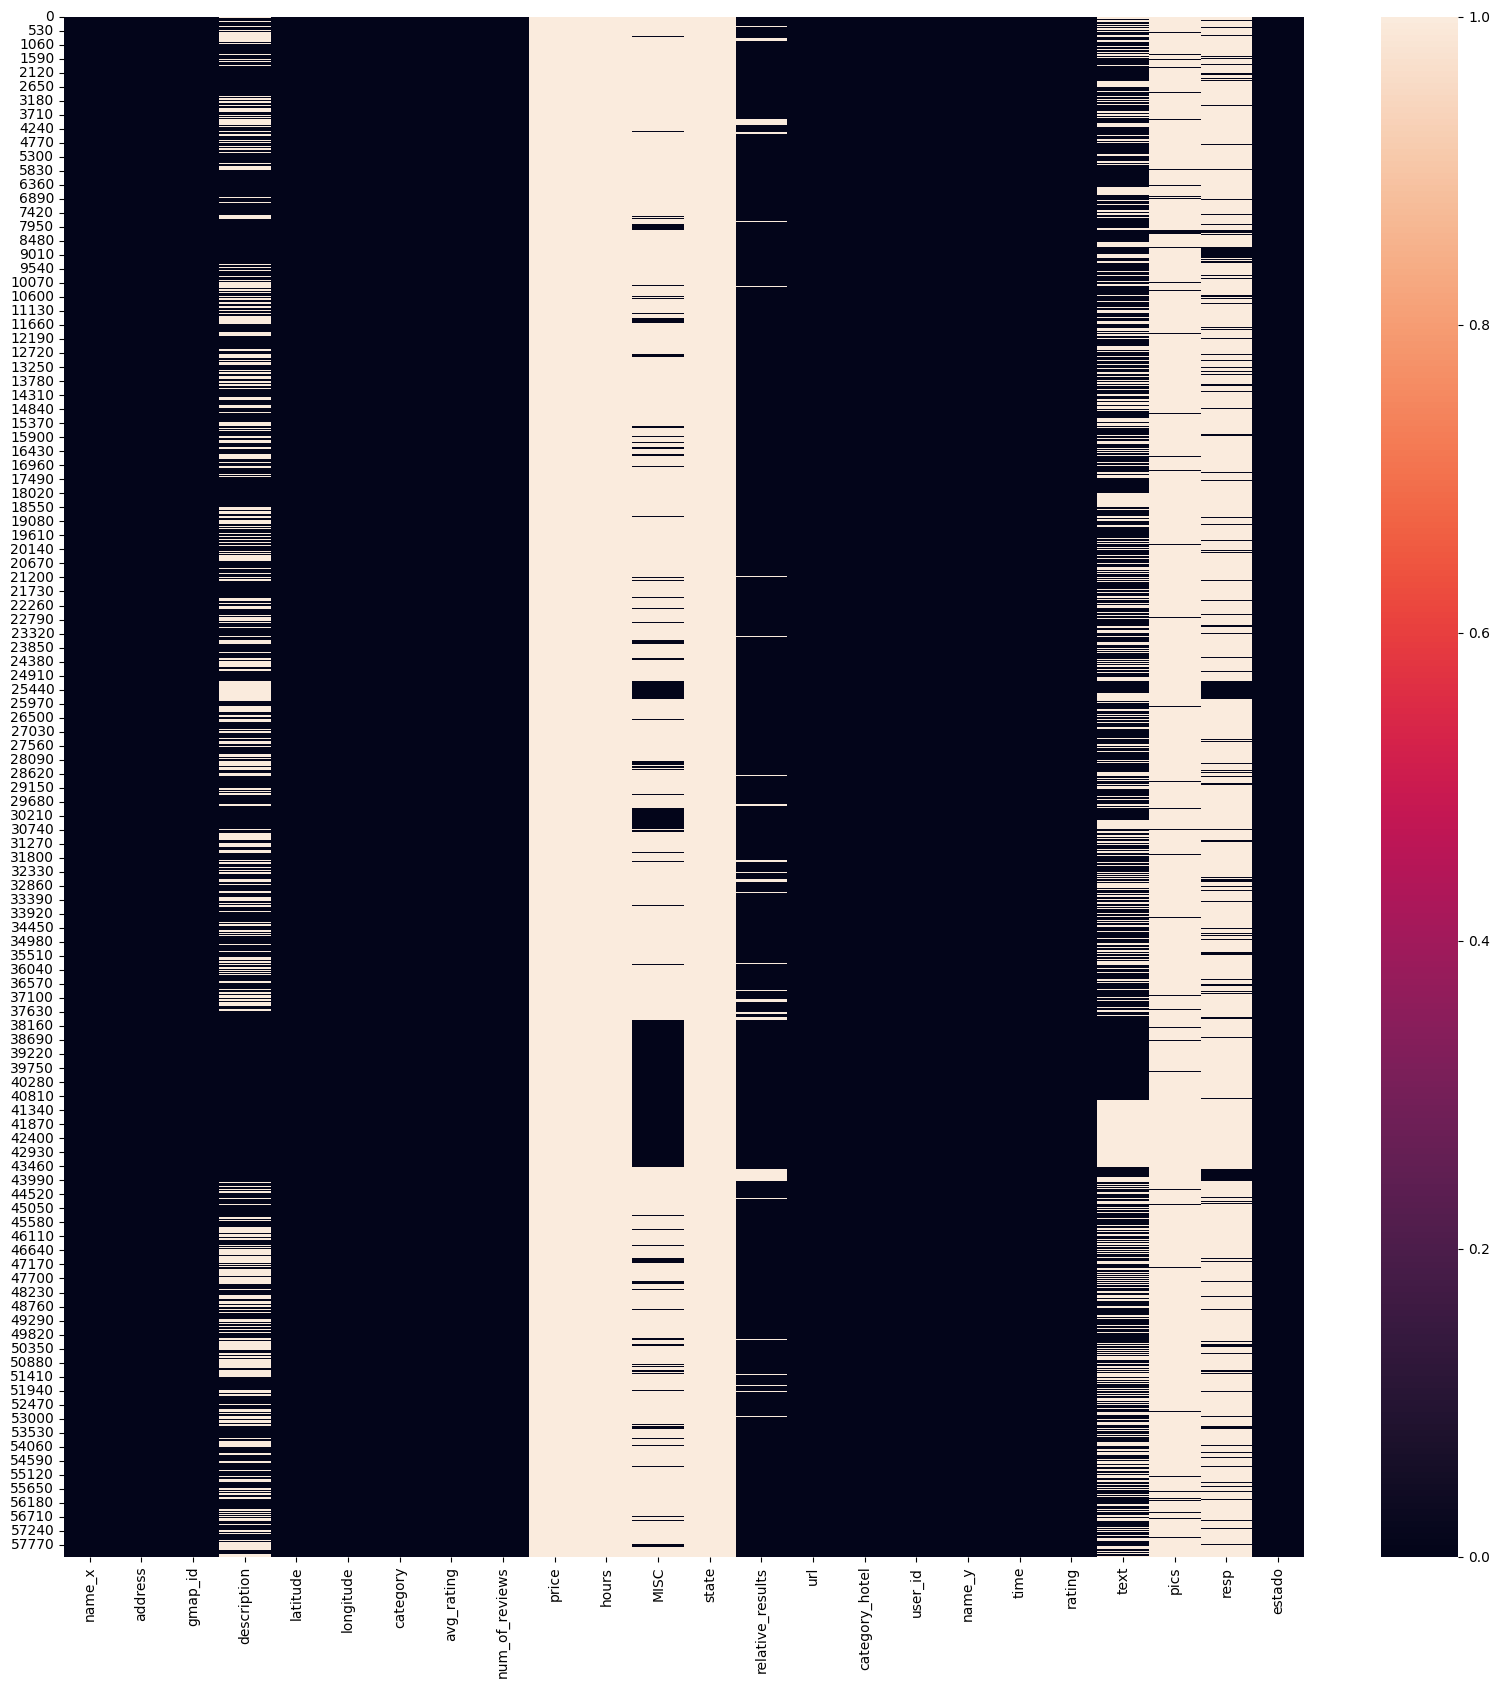

In [26]:
#Graficando mapa de calor para conocer visualmente la existencia de valores nulos
plt.figure(figsize=[20,20])
sns.heatmap(df_estados.isnull()) 
plt.show()

Se destacan las columnas "price", "hours" y "state", pues estas se encuentran sin datos, por lo tanto se toma la decisi√≥n de eliminarlas. As√≠mismo se renombran las columnas con las que se va a trabajar para un mejor entendimiento y se transforma el tipo de dato de la columna "time", que est√° en formato UNIX, a formato fecha.

In [27]:
#Seleccionando las columnas del dataframe que se van a usar y renombr√°ndolas para un mejor entendimiento
df_estados = df_estados.loc[:,['estado', 'name_y', 'rating', 'text', 'time',
                               'name_x', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
                               'category', 'avg_rating', 'num_of_reviews', 'MISC', 'relative_results', 'url'
                               ]].rename(columns={'estado':'state', 'name_x':'name_hotel', 'name_y':'name_user', 
                                                  'rating':'rating_user', 'text':'text_user', 'time':'time_user'})
df_estados['time_user'] = df_estados['time_user'].apply( lambda x: datetime.fromtimestamp(x//1000).date() ) #tranformar formato UNIX a formato fecha
df_estados.head(2)

state  ...                                                url
0  Alabama  ...  https://www.google.com/maps/place//data=!4m2!3...
1  Alabama  ...  https://www.google.com/maps/place//data=!4m2!3...

[2 rows x 17 columns]

Se realiza nuevamente un heatmap para visualizar las columnas (y datos nulos) con las que qued√≥ el dataframe.

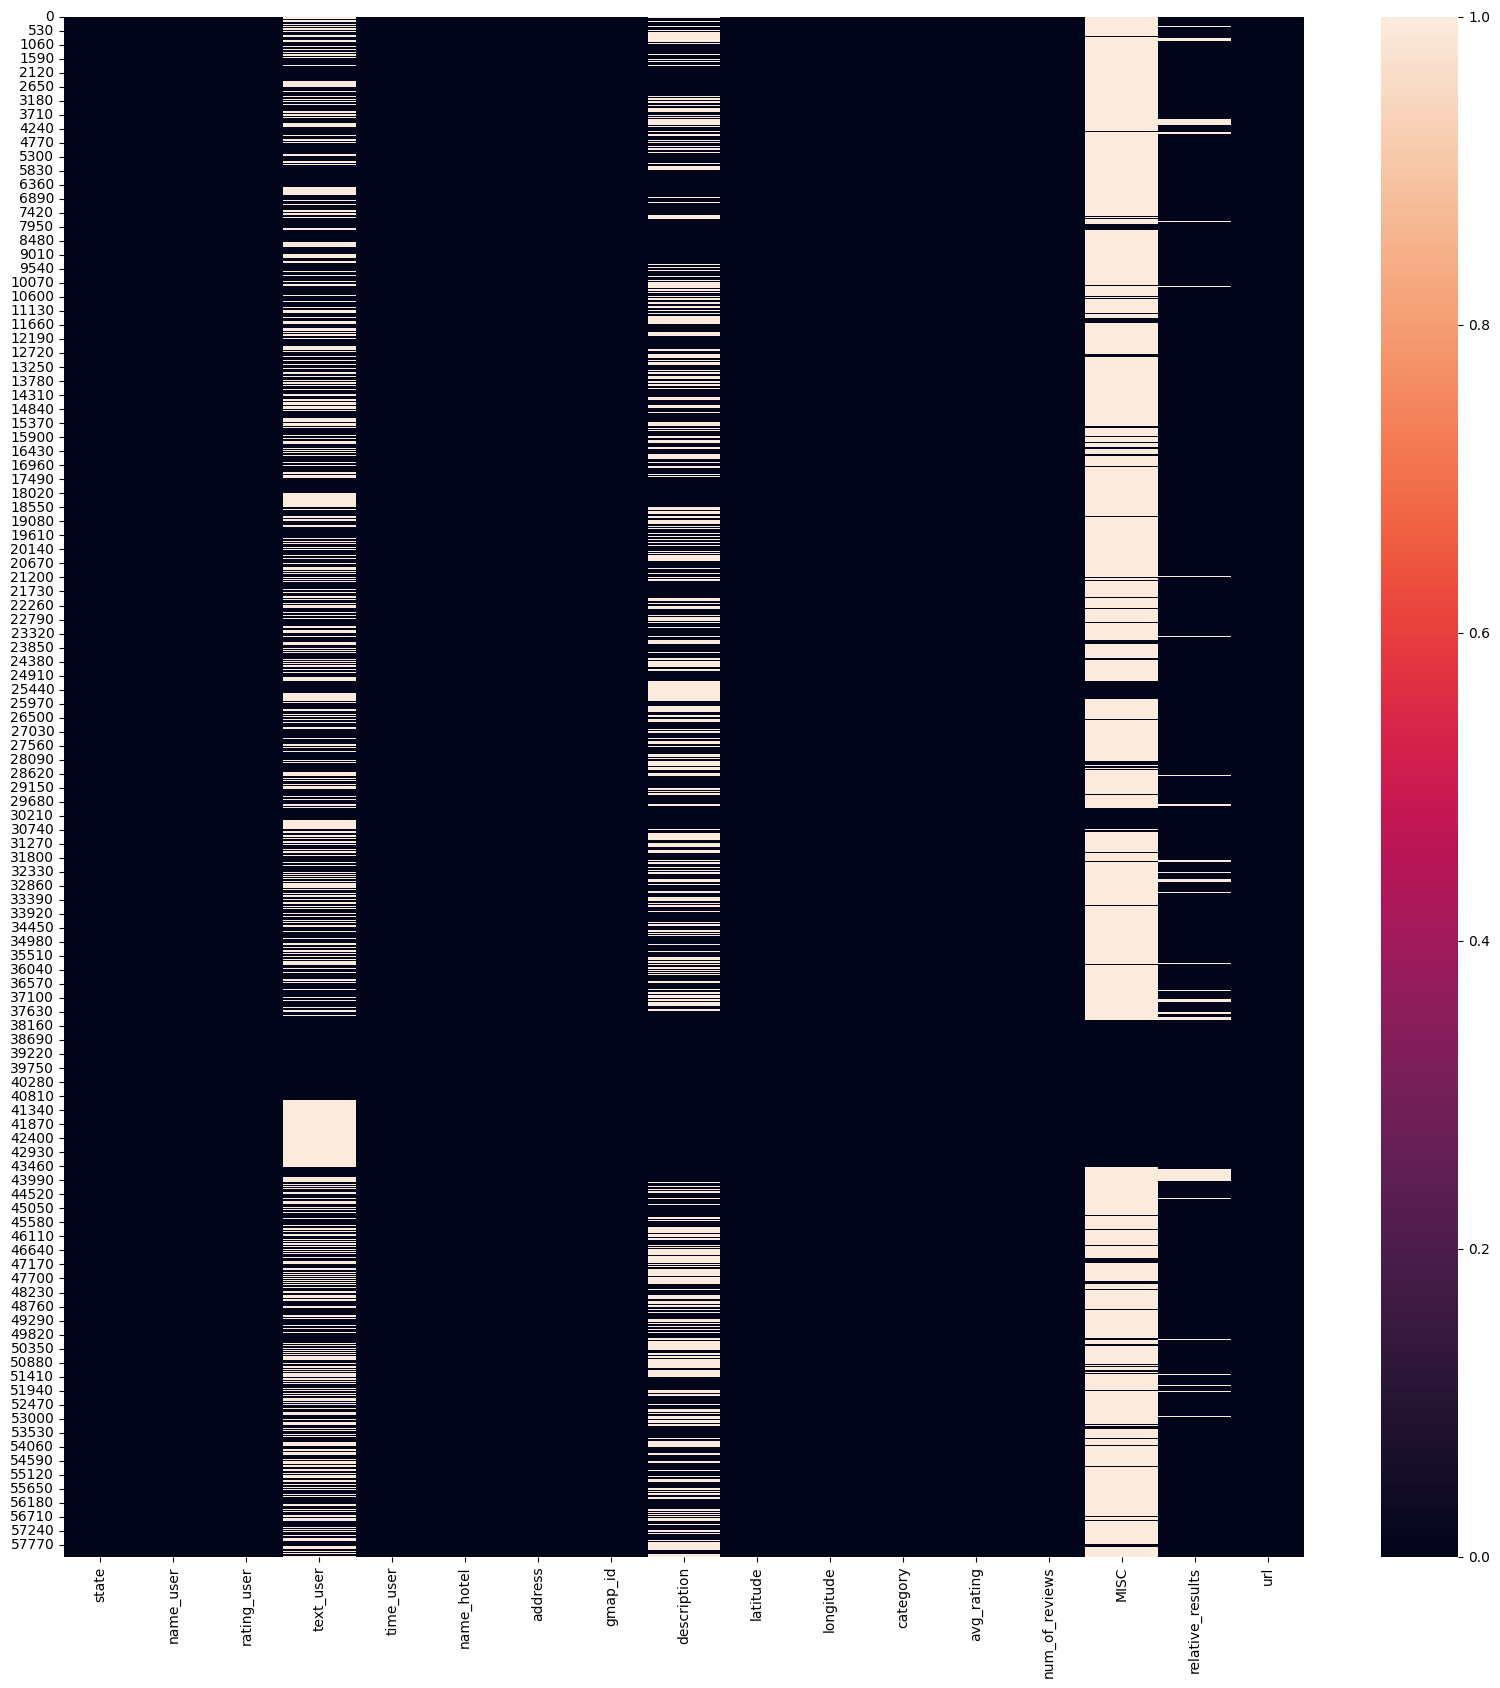

In [30]:
plt.figure(figsize=[20,20])
sns.heatmap(df_estados.isnull()) 
plt.show()

Se destaca que el dataframe cuenta ahora con 17 columnas, de las cuales 'text_user', 'description', 'MISC' y 'relative_results' tienen campos vac√≠os, sin embargo permanecen en el dataset ya que se considera que su informaci√≥n ser√° de utilidad para an√°lisis posteriores.

Por otra parte, se procede a normalizar el dataframe con el objetivo de minimizar la redundancia de datos y una facilidad de gesti√≥n posterior. Para ello se separa en 2 dataframes quedando relacionados por la columna 'state' y 'name_hotel'.

In [31]:
#'df_estados' se separa en 'df_state'
df_state = df_estados.drop_duplicates(df_estados.columns[df_estados.columns.isin(['name_hotel'])])
df_state = df_state.loc[:,['state', 'name_hotel', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
                'category', 'avg_rating', 'num_of_reviews', 'MISC', 'relative_results', 'url']].reset_index(drop=True)
df_state.to_csv('df_state.csv') #exportar dataframe
df_state.head(3)


state  ...                                                url
0  Alabama  ...  https://www.google.com/maps/place//data=!4m2!3...
1  Alabama  ...  https://www.google.com/maps/place//data=!4m2!3...
2  Alabama  ...  https://www.google.com/maps/place//data=!4m2!3...

[3 rows x 13 columns]

In [32]:
#'df_estados' se separa en 'df_reviews' que contiene las rese√±as de los usuarios
df_reviews = df_estados.loc[:,['state', 'name_hotel', 'name_user', 'rating_user', 'text_user', 'time_user']]
df_reviews.to_csv('df_reviews.csv') #exportar dataframe
df_reviews.head(2)

state  ...   time_user
0  Alabama  ...  2016-02-06
1  Alabama  ...  2017-04-11

[2 rows x 6 columns]

Aunque se realiz√≥ una normalizaci√≥n del dataframe principal se usar√° este para conocer, a trav√©s de un heatmap, la correlaci√≥n existente entre las variables num√©ricas.

<Axes: >

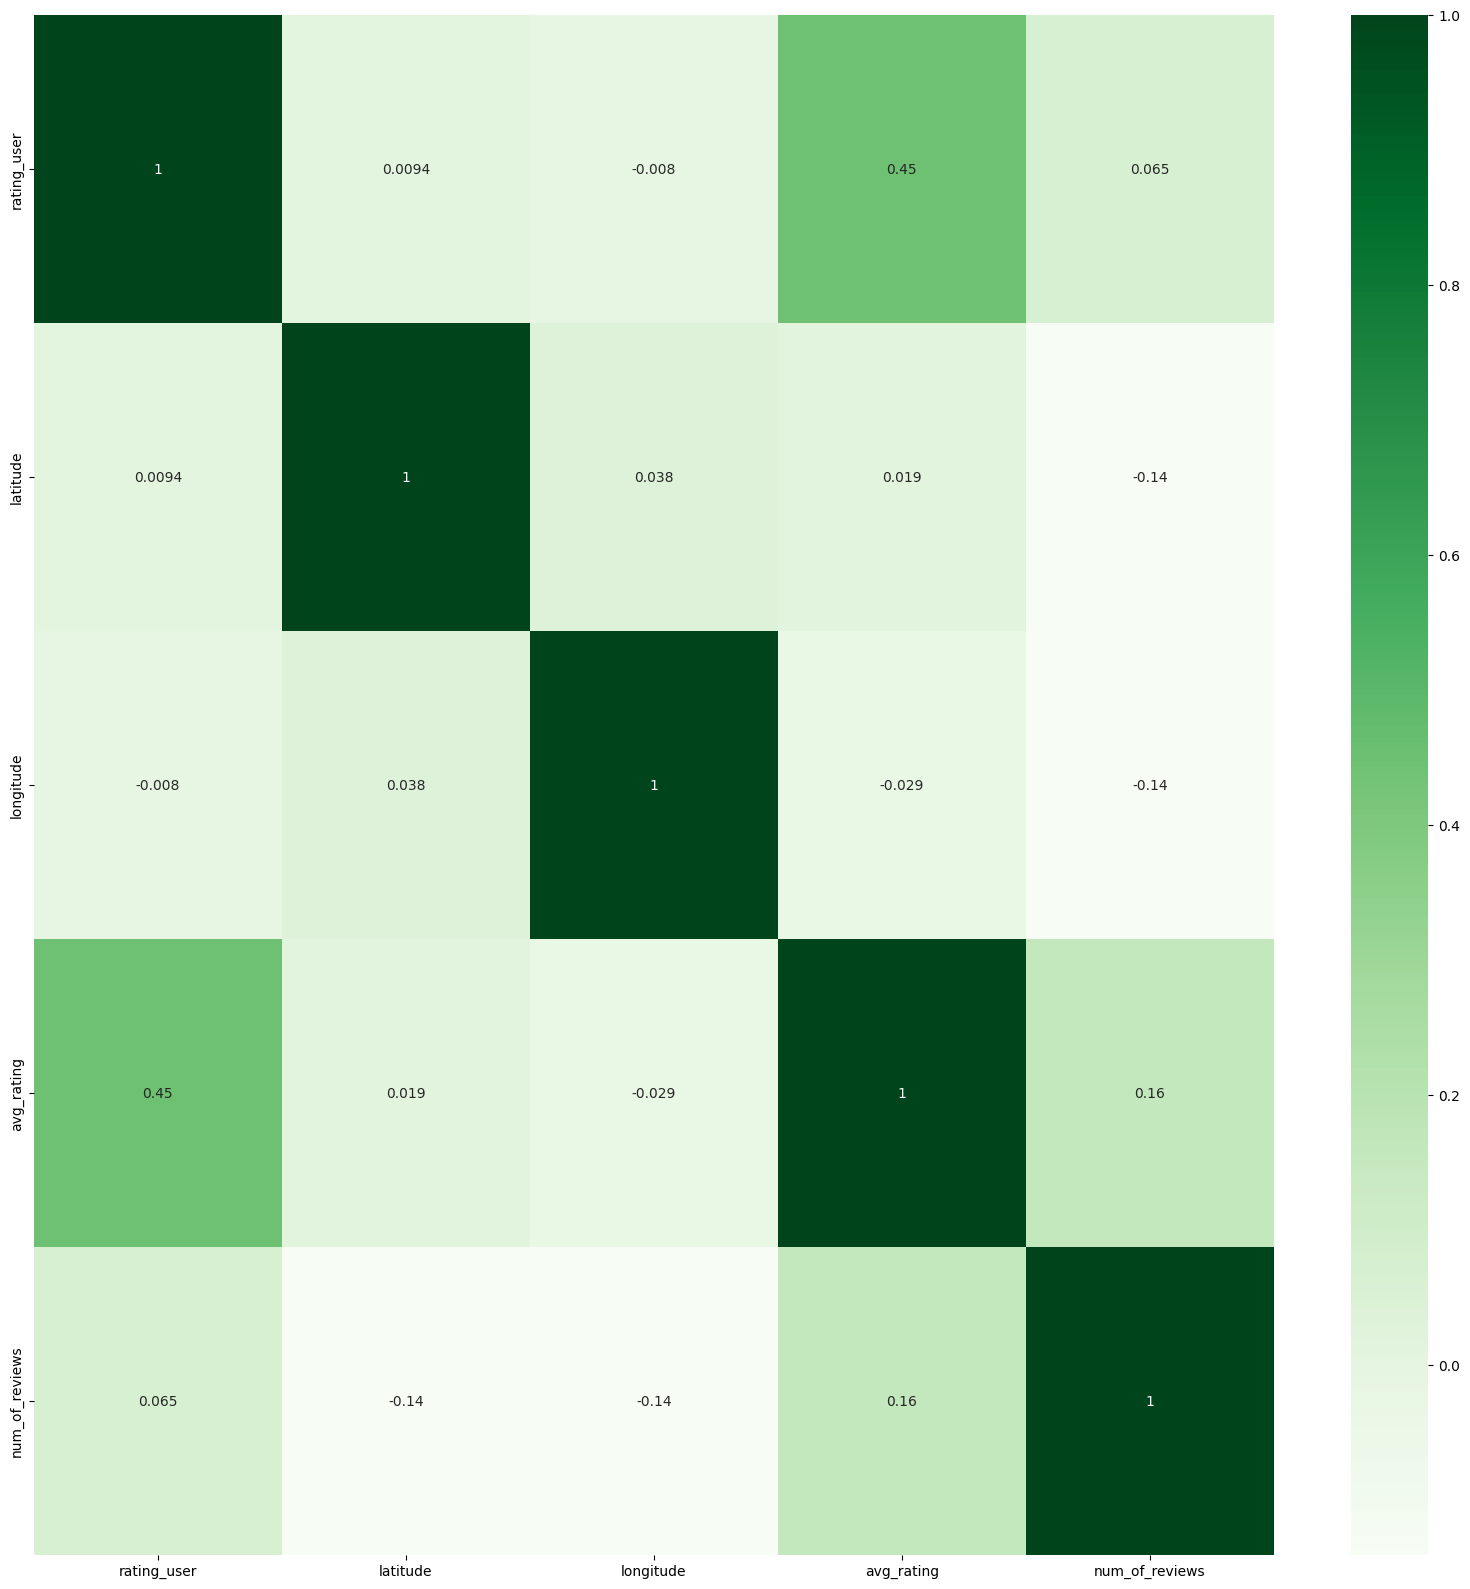

In [33]:
correlac = df_estados.corr(numeric_only = True)
plt.figure(figsize=[20,20])
sns.heatmap(correlac, annot=True, cmap='Greens')

Observando el gr√°fico, podemos concluir que las variables no estan correlacionadas en un rango significativo pues el valor m√°s alto de correlaci√≥n es de 0.45 que se da entre 'rating_user' y 'avg_rating'.


Continuando con el an√°lisis se procede a calcular y visualizar la cantidad de opiniones presentadas por los usuarios en cada estado.

In [34]:
state_reviews = df_state.drop_duplicates(df_estados.columns[df_estados.columns.isin(['state'])], keep='first').groupby('state')['num_of_reviews'].sum().reset_index(name="num_reviews")
state_reviews

state  num_reviews
0                Alabama           38
1                 Alaska           45
2                Arizona           24
3               Arkansas           18
4             California           48
5               Colorado          258
6            Connecticut          117
7               Delaware           26
8   District_of_Columbia          198
9                Florida           46
10               Georgia           18
11                Hawaii           46
12                 Idaho           18
13              Illinois           95
14               Indiana           55
15                  Iowa           48
16                Kansas           78
17              Kentucky           18
18             Louisiana           48
19                 Maine          114
20              Maryland          198
21         Massachusetts          205
22              Michigan           26
23             Minnesota           16
24           Mississippi           54
25              Missouri           44
26               Montana           68
27              Nebraska           65
28                Nevada          218
29         New_Hampshire           18
30            New_Jersey           48
31            New_Mexico          196
32              New_York           38
33        North_Carolina            8
34          North_Dakota          213
35                  Ohio           18
36              Oklahoma          186
37                Oregon          178
38          Pennsylvania           48
39          Rhode_Island          168
40        South_Carolina           68
41          South_Dakota           38
42             Tennessee           45
43                 Texas           14
44                  Utah           18
45               Vermont           38
46              Virginia          175
47            Washington            8
48         West_Virginia           28
49             Wisconsin           16
50               Wyoming           28

Se procede a crear un histograma de frecuencia para observar la distribuci√≥n de los datos

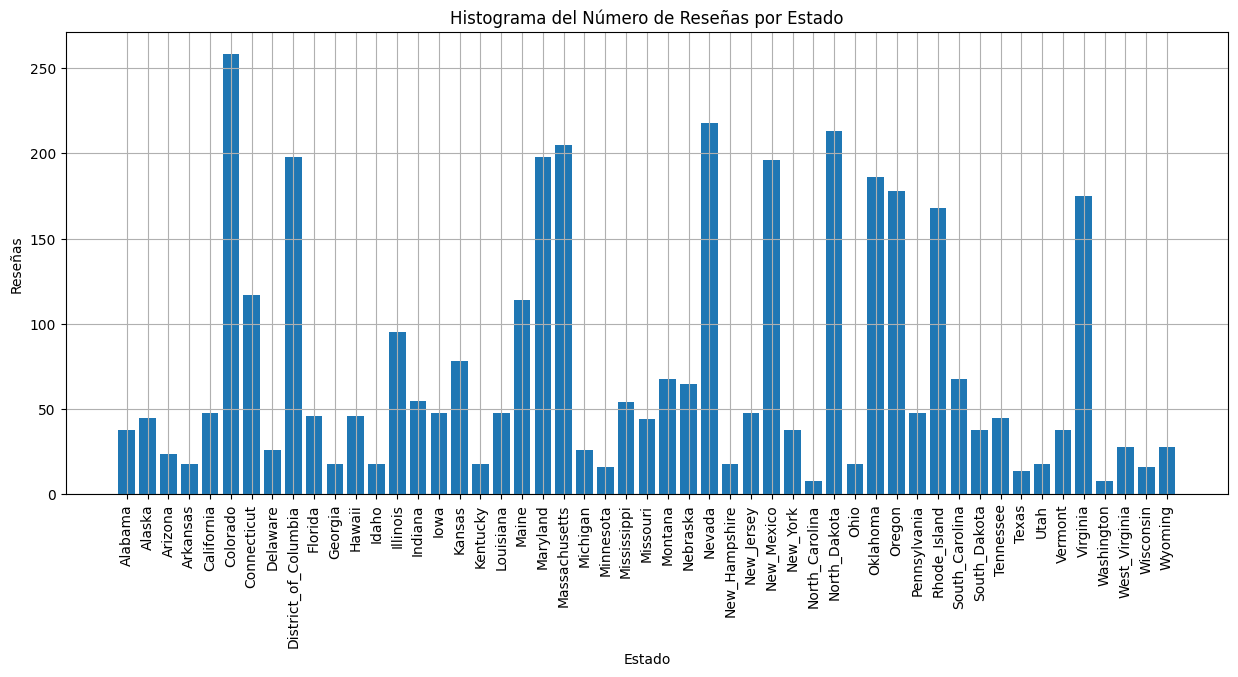

In [35]:
plt.figure(figsize=(15, 6))
plt.bar(state_reviews['state'], state_reviews['num_reviews'])
plt.xlabel('Estado')
plt.ylabel('Rese√±as')
plt.title('Histograma del N√∫mero de Rese√±as por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Se observa que la mayor cantidad de rese√±as de los usuarios es en el estado de Colorado con un total de 258, seguido de Nevada con 218 y Massachusetts con 205; por otra parte los estados que tienen una menor cantidad son North Carolina y Washington con 8 rese√±as en total.

Tambi√©n se calcula y visualiza la cantidad de hoteles que existen en cada estado.

In [44]:
num_hotels = df_state.groupby('state')['name_hotel'].count().reset_index(name='num_hotels')
num_hotels

state  num_hotels
0                Alabama          35
1                 Alaska           2
2                Arizona          39
3               Arkansas          16
4             California          83
5               Colorado          45
6            Connecticut          14
7               Delaware           1
8   District_of_Columbia           1
9                Florida          75
10               Georgia          71
11                Hawaii          12
12                 Idaho           6
13              Illinois          34
14               Indiana          19
15                  Iowa          12
16                Kansas          18
17              Kentucky          21
18             Louisiana          38
19                 Maine           5
20              Maryland          13
21         Massachusetts          11
22              Michigan          35
23             Minnesota          24
24           Mississippi          21
25              Missouri          41
26               Montana          16
27              Nebraska          15
28                Nevada          16
29         New_Hampshire           4
30            New_Jersey          22
31            New_Mexico          14
32              New_York          75
33        North_Carolina          30
34          North_Dakota           7
35                  Ohio          67
36              Oklahoma          40
37                Oregon          17
38          Pennsylvania          73
39          Rhode_Island           3
40        South_Carolina          36
41          South_Dakota           9
42             Tennessee          43
43                 Texas          87
44                  Utah          16
45               Vermont           3
46              Virginia          47
47            Washington          41
48         West_Virginia           6
49             Wisconsin          40
50               Wyoming           3

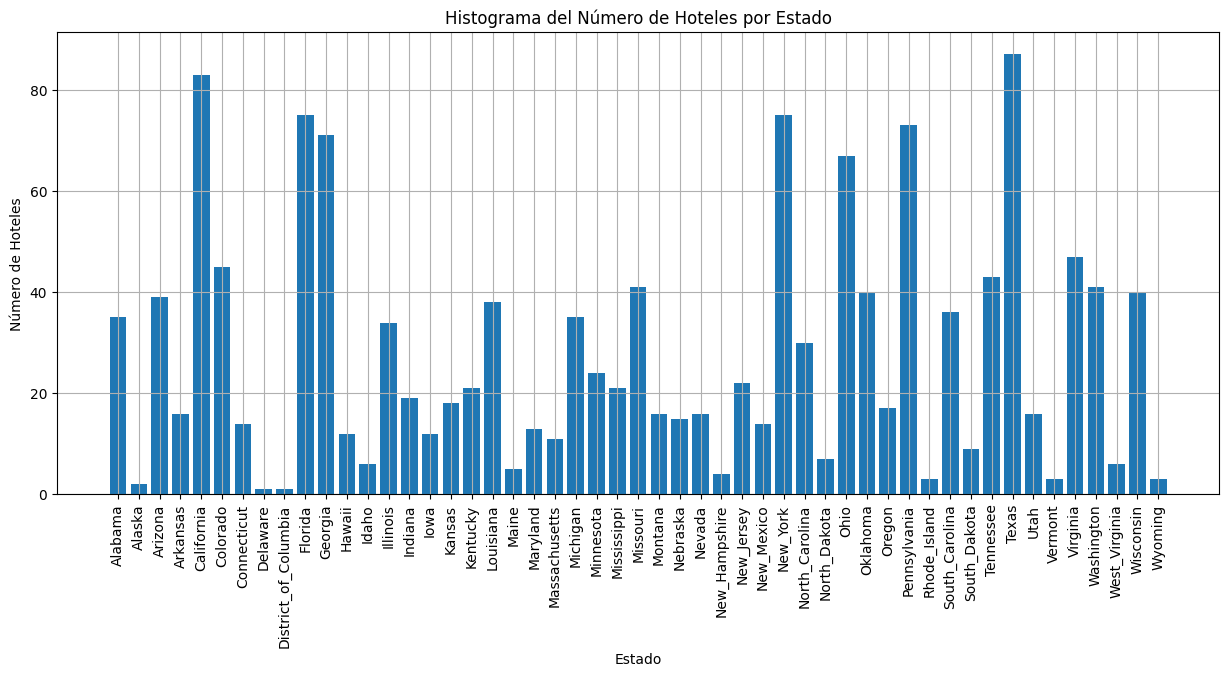

In [45]:
plt.figure(figsize=(15, 6))
plt.bar(num_hotels['state'], num_hotels['num_hotels'])
plt.xlabel('Estado')
plt.ylabel('N√∫mero de Hoteles')
plt.title('Histograma del N√∫mero de Hoteles por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Se observa que la mayor cantidad de hoteles se encuentra en el estado de Texas con un total de 87, seguido de California con 83, New York y Florida con 75; por otra parte los estados que tienen una menor cantidad son Delaware y Distric_of_Columbia con 1 hotel en total.

Tambi√©n se calcula y visualiza la cantidad de reviews u opiniones de los usuarios por a√±o.

In [62]:
num_reviews_year = df_reviews.groupby(df_reviews['time_user'].apply(lambda x: x.year))['text_user'].count().reset_index(name='num_reviews')
num_reviews_year

time_user  num_reviews
0        2007            2
1        2008            3
2        2009            2
3        2010           10
4        2011           43
5        2012           73
6        2013          153
7        2014          216
8        2015          717
9        2016         4963
10       2017         8718
11       2018        10405
12       2019         7289
13       2020         2969
14       2021         1487

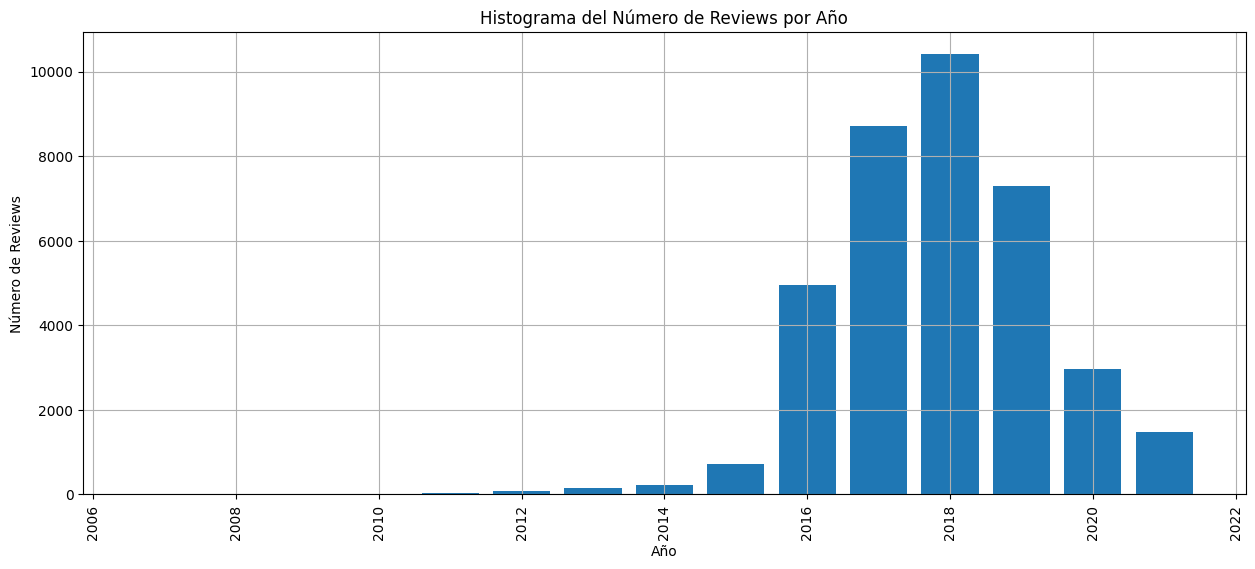

In [63]:
plt.figure(figsize=(15, 6))
plt.bar(num_reviews_year['time_user'], num_reviews_year['num_reviews'])
plt.xlabel('A√±o')
plt.ylabel('N√∫mero de Reviews')
plt.title('Histograma del N√∫mero de Reviews por A√±o')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

El a√±o con mayor interacci√≥n de los usuarios fue el 2018 con 10405 opiniones.